# RH IC Final Analysis Part II Qs 5 & 6

# Table of Contents
This notebook is in reference to: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 

Import libraries and data set

Merging dataframes

Creating age groups

Creating family or single with or without dependents groups

Creating income categories

Combining family status characteristics to customer profile

Combining income categories to customer profile

Taking a look at impact of day of week and hour of day IC customer profile purchases

Creating visualizations to show the distribution of profiles.

Exporting customer profiling variables

#  Importing libraries and data set

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Defining and creating a path, importing and then double checking imported merged project data set

In [4]:
#Establishing a path to import the project data set
path = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A4 PYTHON/RH_PYTHON_Instacart Basket Analysis'

In [5]:
#Checking path
path

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A4 PYTHON/RH_PYTHON_Instacart Basket Analysis'

In [6]:
#Importing final_orders_products_active.pkl data set as a df
df_final= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_orders_products_active.pkl'))

In [7]:
#double checking the imported df
df_final.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependants,fam_status,income,region,Customer_Activity,exclusion_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer


In [8]:
# checking shape and dimensions (columns and rows) of import
df_final.shape

(30992664, 35)

In [9]:
#checking the department_id
df_final['department_id']

0           7
1           7
2           7
3           7
4           7
           ..
32434203    7
32434204    7
32434205    7
32434206    7
32434207    7
Name: department_id, Length: 30992664, dtype: int64

In [10]:
#Importing departments_wrangled df
df_deptsw = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [11]:
#Checking the import
df_deptsw

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
#Renaming Unnamed:0 to department_id
df_deptsw.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [13]:
#Checking rename
df_deptsw

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
#Merging departments and orders products dfs
df_deptsw_merge = df_final.merge(df_deptsw, on = 'department_id')

In [15]:
#Checking the merge
df_deptsw_merge

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,n_dependants,fam_status,income,region,Customer_Activity,exclusion_flag,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,Active,active customer,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992659,525976,58201,prior,24,6,16,3.0,5161,1,1,...,Florida,75,2/8/2019,2,married,138066,South,Active,active customer,bulk
30992660,758290,58201,prior,26,0,12,9.0,5161,1,1,...,Florida,75,2/8/2019,2,married,138066,South,Active,active customer,bulk
30992661,460711,58201,prior,27,6,9,13.0,5161,1,1,...,Florida,75,2/8/2019,2,married,138066,South,Active,active customer,bulk
30992662,1605789,58201,prior,28,5,7,27.0,5161,1,1,...,Florida,75,2/8/2019,2,married,138066,South,Active,active customer,bulk


In [16]:
# checking merge dimensions, rows counts
df_deptsw_merge.shape

(30992664, 36)

In [17]:
# Exporting merge as pkl 
df_deptsw_merge.to_pickle(os.path.join(path, '02 Data/Prepared Data/final_merge_deptsw_active.pkl'))

# 5. Customer profiling

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

# 6. Create an appropriate visualization to show the distribution of profiles.

Customer profiles based on age groups

In [18]:
#Checking the minimum age
df_deptsw_merge['age'].min()

18

In [19]:
#Checking the average age
df_deptsw_merge['age'].mean()

49.467933411597016

In [20]:
#Checking the max age
df_deptsw_merge['age'].max()

81

# Creating three age groups; 18-39, 40-59 and 60-81 and min, mean and max values

In [21]:
#age group 18-39
df_deptsw_merge.loc[(df_deptsw_merge['age']>=18) & (df_deptsw_merge['age'] <=39), 'age_group'] = '18-39 years of age'

In [22]:
#age group 40-59
df_deptsw_merge.loc[(df_deptsw_merge['age']>=40) & (df_deptsw_merge['age']<=59), 'age_group'] = '40-59 years of age'

In [23]:
#age group 60-81
df_deptsw_merge.loc[(df_deptsw_merge['age']>=60) & (df_deptsw_merge['age'] <=81), 'age_group'] = '60-81 years of age'

#Checking three new groups
df_deptsw_merge['age_group'].value_counts(dropna = False)

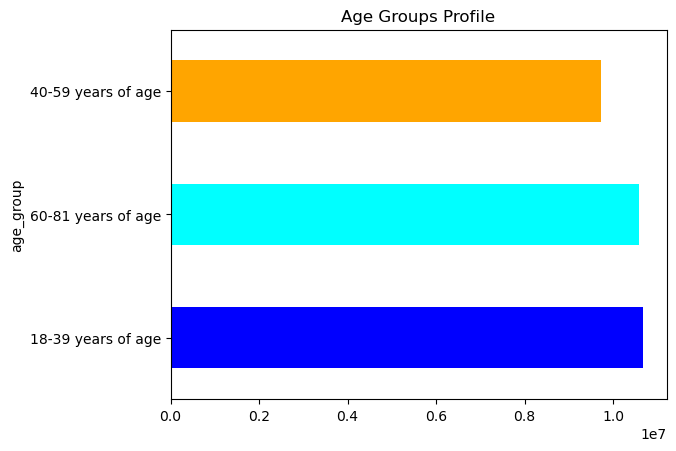

In [24]:
#Creating a bar chart of IC customers age groups
barage = df_deptsw_merge['age_group'].value_counts().plot.barh(color = ['blue', 'cyan', 'orange'], title = 'Age Groups Profile')

In [25]:
#Exporting and saving it to IC folder
barage.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'final_age_profile.png'))

In [26]:
#Checking age_group column
df_deptsw_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,age,date_joined,n_dependants,fam_status,income,region,Customer_Activity,exclusion_flag,department,age_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,31,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,31,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age
2,473747,1,prior,3,3,12,21.0,196,1,1,...,31,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,31,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age
4,431534,1,prior,5,4,15,28.0,196,1,1,...,31,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age


There are no under age <18 years of age IC customers.

# Creating with and without dependents groups and min, mean and max values

In [27]:
df_deptsw_merge['n_dependants'].min()

0

In [28]:
df_deptsw_merge['n_dependants'].mean()

1.5017984578544135

In [29]:
df_deptsw_merge['n_dependants'].max()

3

In [30]:
#with dependents
df_deptsw_merge.loc[df_deptsw_merge['n_dependants'] > 0, 'dependents_group'] = 'with dependents'

In [31]:
#without dependents
df_deptsw_merge.loc[df_deptsw_merge['n_dependants'] <= 0, 'dependents_group'] = 'without dependents'

In [32]:
#Checking new groups
df_deptsw_merge['dependents_group'].value_counts(dropna = False)

dependents_group
with dependents       23245632
without dependents     7747032
Name: count, dtype: int64

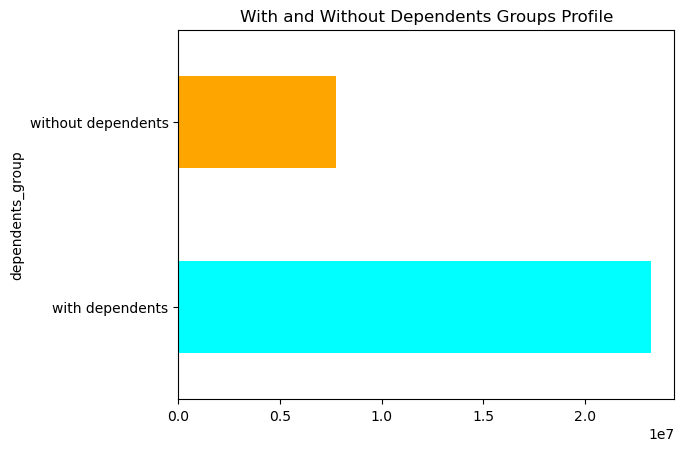

In [33]:
#Creating a bar chart of IC customers with and without dependents groups
bardependents = df_deptsw_merge['dependents_group'].value_counts().plot.barh(color = ['cyan', 'orange'], title = 'With and Without Dependents Groups Profile')

In [34]:
#Exporting and saving it to IC folder
bardependents.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'final_dependents_profile.png'))

Results: 75% of IC customers are with dependents. ANd therefore, 25% are without dependents.

In [35]:
#Checking columns of new group
df_deptsw_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,fam_status,income,region,Customer_Activity,exclusion_flag,department,age_group,dependents_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents
2,473747,1,prior,3,3,12,21.0,196,1,1,...,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents
4,431534,1,prior,5,4,15,28.0,196,1,1,...,2/17/2019,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents


# Creating three income groups and min, mean and max values

In [36]:
df_deptsw_merge['income'].min()

25903

In [37]:
df_deptsw_merge['income'].mean()

99673.22000835424

In [38]:
df_deptsw_merge['income'].max()

593901

In [39]:
# income below $50
df_deptsw_merge.loc[df_deptsw_merge['income']<50000,'income_group'] ='lower income'

In [40]:
# income  $50000 - $150000
df_deptsw_merge.loc[(df_deptsw_merge['income']>=50000) & (df_deptsw_merge['income']<150000),'income_group'] ='middle income'

In [41]:
# income $150000 and above
df_deptsw_merge.loc[df_deptsw_merge['income']>=150000,'income_group'] ='higher income'

In [42]:
#Checking new groups
df_deptsw_merge['income_group'].value_counts(dropna=False)

income_group
middle income    23727864
higher income     3898651
lower income      3366149
Name: count, dtype: int64

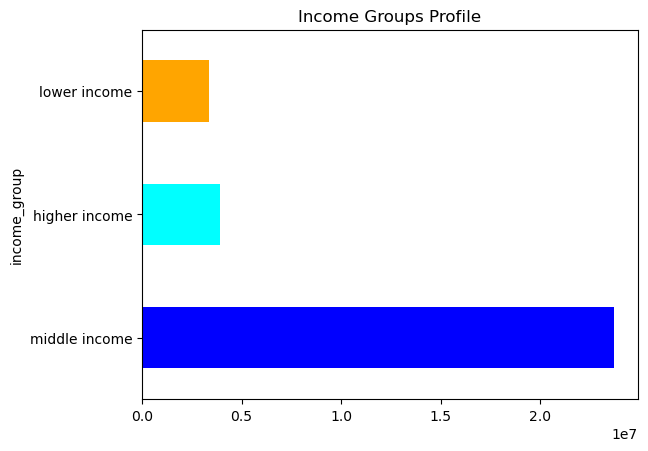

In [43]:
#Creating a bar chart of IC customers icnome groups
barincome = df_deptsw_merge['income_group'].value_counts().plot.barh(color = ['blue', 'cyan', 'orange'], title = 'Income Groups Profile')

In [44]:
#Exporting and saving it to IC folder
barincome.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'final_income_profile.png'))

Lower income IC customers account for 11%, while 89% are in middle to higher income brackets. 

In [45]:
#Checking column of new income_group
df_deptsw_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,n_dependants,fam_status,income,region,Customer_Activity,exclusion_flag,department,age_group,dependents_group,income_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income
2,473747,1,prior,3,3,12,21.0,196,1,1,...,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income
4,431534,1,prior,5,4,15,28.0,196,1,1,...,3,married,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income


# fam_status Customer profiles - single, aged 18-39, without dependents and married ages 40-59 and/or 60-81, with dependents

#Creating a profile_fam_age_deps based on fam_status, age_group and n_dependents

# single & without dependents

In [46]:
#18-39 years of age single young adult without deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_fam_age_deps']= 'single young aged 18-39 without dependents'

In [47]:
# 40 - 59 years of age single without deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_fam_age_deps']= 'single aged 40-59 without dependents'

In [48]:
# 60-81 years of age single older without deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_fam_age_deps']= 'single older aged 60-81 without dependents'

# single & with dependents

In [49]:
#18-39 years of age single young adult with deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status'] == 'living with parents and siblings') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_fam_age_deps']= 'single young aged 18-39 with dependents'

In [50]:
#40-59 years of age single young adult with deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status'] == 'living with parents and siblings') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_fam_age_deps']= 'single aged 40-59 with dependents'

In [51]:
#60-81 years of age single older adult with deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status'] == 'living with parents and siblings') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_fam_age_deps']= 'single older aged 60-81 with dependents'

# married with dependents

In [52]:
#18-39 years of age married young with deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status'] == 'married') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_fam_age_deps']= 'married young aged 18-39 with dependents'

In [53]:
#40-59 years of married with deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status'] == 'married') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_fam_age_deps']= 'married aged 40-59 with dependents'

In [54]:
#60-81 years of age married older with deps
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status'] == 'married') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_fam_age_deps']= 'married older aged 60-81 with dependents'

In [55]:
# Checking new groups
df_deptsw_merge['profile_fam_age_deps'].value_counts(dropna = False)

profile_fam_age_deps
married older aged 60-81 with dependents      7936180
married aged 40-59 with dependents            7297748
married young aged 18-39 with dependents      6529093
single young aged 18-39 without dependents    2662946
single older aged 60-81 without dependents    2647761
single aged 40-59 without dependents          2436325
single young aged 18-39 with dependents       1482611
Name: count, dtype: int64

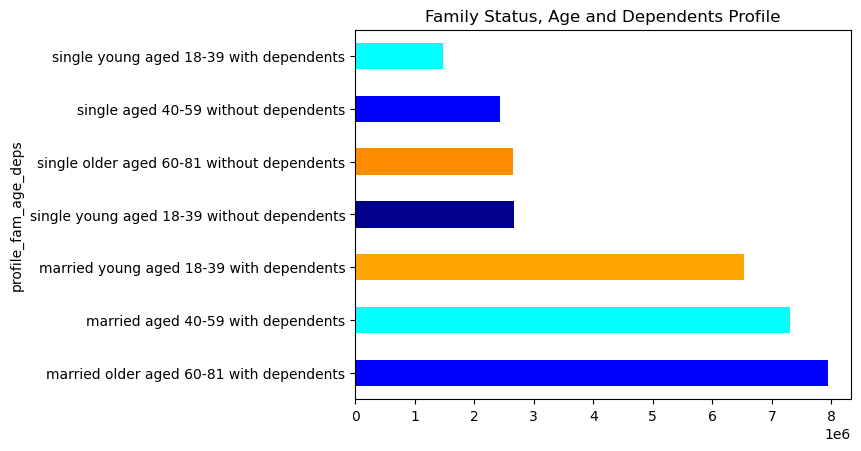

In [56]:
#Creating a bar chart of IC profile family, age & with or without dependents groups
barfamagedeps = df_deptsw_merge['profile_fam_age_deps'].value_counts().plot.barh(color = ['blue', 'cyan', 'orange', 'darkblue', 'darkorange'], title = 'Family Status, Age and Dependents Profile')

In [57]:
#Exporting and saving it to IC folder
barfamagedeps.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'final_fam_age_deps_profile.png'))

In [58]:
#Checking fam_status counts
df_deptsw_merge['fam_status'].value_counts(dropna = False)

fam_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

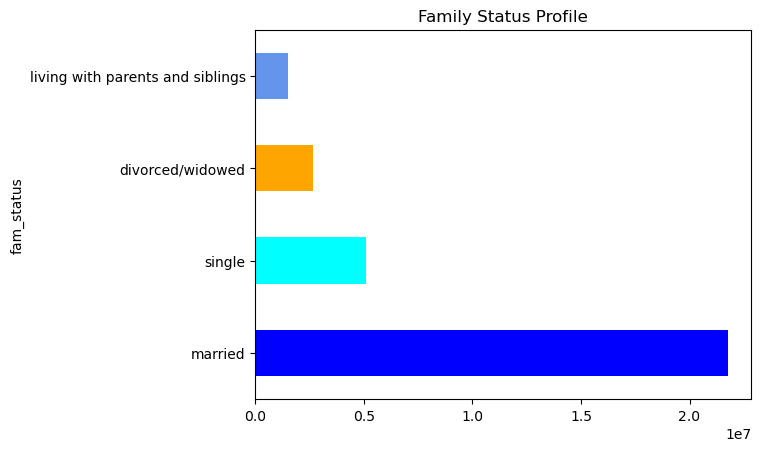

In [59]:
#Creating a bar chart of IC customers family status groups
barfamilystatus = df_deptsw_merge['fam_status'].value_counts().plot.barh(color = ['blue', 'cyan', 'orange', 'cornflowerblue'], title = 'Family Status Profile')

In [60]:
#Exporting and saving it to IC folder
barfamilystatus.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'final_family_status_profile.png'))

In [61]:
#Creating a crosstab for family status with or without dependents
family_dependents_crosstab=pd.crosstab(df_deptsw_merge['dependents_group'], df_deptsw_merge['fam_status'], dropna=False)

In [62]:
#Checking the new crosstab
family_dependents_crosstab

fam_status,divorced/widowed,living with parents and siblings,married,single
dependents_group,,,,
with dependents,0,1482611,21763021,0
without dependents,2647761,0,0,5099271


Results: Only 25 % of IC customers are (single) adults without dependents. As a result, 75% of IC customers are families with dependents. 

In [63]:
#Sending to clipboard for Excel
family_dependents_crosstab.to_clipboard

<bound method NDFrame.to_clipboard of fam_status          divorced/widowed  living with parents and siblings  \
dependents_group                                                         
with dependents                    0                           1482611   
without dependents           2647761                                 0   

fam_status           married   single  
dependents_group                       
with dependents     21763021        0  
without dependents         0  5099271  >

In [64]:
#Creating a crosstab to include the age_group and with or without dependents comparison
ages_dependents_crosstab =pd.crosstab(df_deptsw_merge['age_group'], df_deptsw_merge['dependents_group'],dropna=False)

In [65]:
#Checking the new crosstab
ages_dependents_crosstab

dependents_group,with dependents,without dependents
age_group,,
18-39 years of age,8011704,2662946
40-59 years of age,7297748,2436325
60-81 years of age,7936180,2647761


In [66]:
#Sending to clipboard for Excel
ages_dependents_crosstab.to_clipboard()

In [67]:
#checking dimensions of fam_status total
df_deptsw_merge['fam_status'].shape

(30992664,)

Results: Further, 65% of IC customers in total are the majority and consisting of family with dependents from the two higher age groups of 40 and above; 40-59 and 60-81 years of age.

Meanwhile, younger families with dependents making up the other 35%. 

Consequently, youngest(aged 18-39)-without dependents only account for less than 9% of IC singles customer base, while age groups 40 and above-without dependents make up 16%.

Therefore, it is recommended that the IC customer experience caters to families and that it is a user-friendly one. 

# The addition of income variable to fam_status Customer profiles:

# single; ages 18-39, 40-59 and 60-81; and with or without dependents  

# married; ages 18-39, 40-59 and/or 60-81; and with or without dependents

# Creating a customer profile based on income-lower, middle, higher variable to fam_status, age, and n_dependents


# Lower income single - with or without dependents

In [68]:
# lower income young single aged 18-39 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'lower income single young aged 18-39 without dependents'

In [69]:
# lower income young aged 18-39 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'lower income young aged 18-39 with dependents'

In [70]:
# lower income single aged 40-59 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'lower income single aged 40-59 without dependents'

In [71]:
# lower income single middle aged 40-59 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'lower income aged 40-59 with dependents'

In [72]:
# lower income single older aged 60-81 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'lower income single older aged 60-81 without dependents'

In [73]:
# lower income older aged 60-81 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'lower income older aged 60-81 with dependents'

# Lower income married - with dependents


In [74]:
# lower income young aged 18-39 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='lower income married young aged 18-39 with dependents'

In [75]:
# lower income aged 40-59 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='lower income married aged 40-59 with dependents'

In [76]:
# lower income older aged 60-81 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='lower income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='lower income married older aged 60-81 with dependents'

# Middle income single- with or without dependents

In [77]:
# middle income young single aged 18-39 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'middle income single young aged 18-39 without dependents'

In [78]:
# middle income young aged 18-39 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'middle income young aged 18-39 with dependents'

In [79]:
# middle income single aged 40-59 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'middle income single aged 40-59 without dependents'

In [80]:
# middle income single aged 40-59 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'middle income aged 40-59 with dependents'

In [81]:
# middle income single older aged 60-81 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'middle income single older aged 60-81 without dependents'

In [82]:
# middle income older aged 60-81 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'middle income older aged 60-81 with dependents'

# Middle income married-with dependents

In [83]:
# middle income young aged 18-39 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='middle income married young aged 18-39 with dependents'

In [84]:
# middle income aged 40-59 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='middle income married aged 40-59 with dependents'

In [85]:
# middle income older aged 60-81 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='middle income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='middle income married older aged 60-81 with dependents'

# Higher income-single with or without dependents

In [86]:
# higher income young single aged 18-39 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'higher income single young aged 18-39 without dependents'

In [87]:
# higher income young aged 18-39 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'higher income young aged 18-39 with dependents'

In [88]:
# higher income single aged 40-59 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'higher income single aged 40-59 without dependents'

In [89]:
# higher income single aged 40-59 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'higher income aged 40-59 with dependents'

In [90]:
#higher income older single aged 60-81 without dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'without dependents'), 'profile_income']= 'higher income single older aged 60-81 without dependents'

In [91]:
# higher income older aged 60-81 living with parents and siblings with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status']  == 'living with parents and siblings') & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']= 'higher income older aged 60-81 with dependents'

# Higher income married-with dependents

In [92]:
# higher income young aged 18-39 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '18-39 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='higher income married young aged 18-39 with dependents'

In [93]:
# higher income aged 40-59 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '40-59 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='higher income married aged 40-59 with dependents'

In [94]:
# higher income older aged 60-81 married with dependents
df_deptsw_merge.loc[(df_deptsw_merge['age_group']== '60-81 years of age') & (df_deptsw_merge['fam_status']== 'married') & (df_deptsw_merge['income_group']=='higher income') & (df_deptsw_merge['dependents_group'] == 'with dependents'), 'profile_income']='higher income married older aged 60-81 with dependents'

In [95]:
#Checking profile_income
#Checking new groups
df_deptsw_merge['profile_income'].value_counts(dropna = False)

profile_income
middle income married older aged 60-81 with dependents      5777469
middle income married young aged 18-39 with dependents      5460848
middle income married aged 40-59 with dependents            5341444
middle income single young aged 18-39 without dependents    2212784
middle income single older aged 60-81 without dependents    1922038
middle income single aged 40-59 without dependents          1766466
higher income married older aged 60-81 with dependents      1495718
higher income married aged 40-59 with dependents            1326545
middle income young aged 18-39 with dependents              1246815
lower income married young aged 18-39 with dependents       1004760
lower income married older aged 60-81 with dependents        662993
lower income married aged 40-59 with dependents              629759
higher income single older aged 60-81 without dependents     514799
higher income single aged 40-59 without dependents           459503
lower income single young aged 18

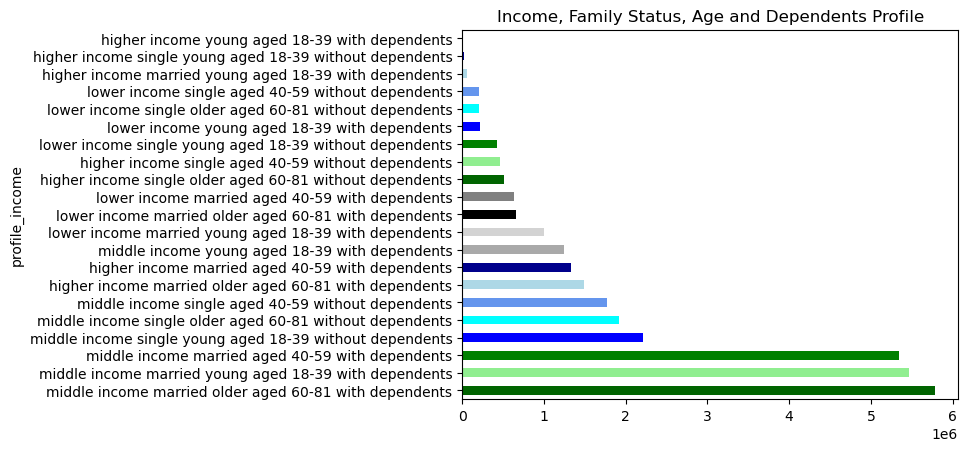

In [96]:
#Creating a bar chart of IC profile adding "income", family, age & with or without dependents groups
barincomefamagedeps = df_deptsw_merge['profile_income'].value_counts().plot.barh(color = ['darkgreen', 'lightgreen', 'green', 'blue', 'cyan', 'cornflowerblue', 'lightblue', 'darkblue', 'darkgrey', 'lightgray', 'black', 'gray',  ], title = 'Income, Family Status, Age and Dependents Profile')

In [97]:
#Exporting and saving it to IC folder
barincomefamagedeps.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'final_profile_income_fam_age_deps.png'))

Observations: 
The customer profile that purchases the most are that of: middle income bracket earners of all ages who are married with dependents. In fact, this group alone includes 53% of IC customers. 

Second are middle income bracket earners of all ages who are single without dependents, making up 19 % of purchasing power. Nonetheless, this group has a difference in spending that is 34% less than the above married group. 

Consequently, lower income customers contribute 11% in total overall. 

Overall, 89% of IC customers are comprised of middle and higher income profiles.  


In [98]:
#Checking column of new profile_income group
df_deptsw_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,income,region,Customer_Activity,exclusion_flag,department,age_group,dependents_group,income_group,profile_fam_age_deps,profile_income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...
2,473747,1,prior,3,3,12,21.0,196,1,1,...,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...
4,431534,1,prior,5,4,15,28.0,196,1,1,...,40423,South,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...


In [99]:
# Checking dimensions
df_deptsw_merge['profile_income'].shape

(30992664,)

In [100]:
#Exporting profile_income merged as pkl
df_deptsw_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_income_merged.pkl'))

# Customer profiles looking at “orders_day_of_week” and “order_hour_of_day” impact

In [101]:
#Checking orders dow 
df_deptsw_merge['orders_day_of_week'].value_counts(dropna=False)

orders_day_of_week
0    5913818
1    5417038
6    4294900
5    4037263
2    4028461
3    3672927
4    3628257
Name: count, dtype: int64

In [102]:
result = []

for value in df_deptsw_merge["orders_day_of_week"]:
    if value == 0:
        result.append("Weekend day")
    elif value == 1:
        result.append("Weekend day")
    else:
        result.append("Week day")

In [103]:
df_deptsw_merge['busiest_period_week'] = result

In [104]:
df_deptsw_merge['busiest_period_week'].value_counts(dropna=False)

busiest_period_week
Week day       19661808
Weekend day    11330856
Name: count, dtype: int64

Observations: More orders on Saturday and mid-week days.

Orders hour of day

In [105]:
df_deptsw_merge.loc[(df_deptsw_merge['order_hour_of_day'] >= 0) & (df_deptsw_merge['order_hour_of_day'] <= 6), 'busiest_period_day'] = 'Unsociable hours'

In [109]:
df_deptsw_merge.loc[(df_deptsw_merge['order_hour_of_day'] >= 7) & (df_deptsw_merge['order_hour_of_day'] <= 12), 'busiest_period_day'] = 'Morning hours'

In [110]:
df_deptsw_merge.loc[(df_deptsw_merge['order_hour_of_day'] >= 13) & (df_deptsw_merge['order_hour_of_day'] <= 18), 'busiest_period_day'] = 'Afternoon hours'

In [112]:
df_deptsw_merge.loc[(df_deptsw_merge['order_hour_of_day'] >= 19) & (df_deptsw_merge['order_hour_of_day'] <= 23), 'busiest_period_day'] = 'Evening hours'

In [113]:
# Checking 
df_deptsw_merge['busiest_period_day'].value_counts(dropna=False)

busiest_period_day
Afternoon hours     13602400
Morning hours       12658379
Evening hours        3882810
Unsociable hours      849075
Name: count, dtype: int64

Observations: Most orders-busiest happen throughout the business morning and afternoon hours, also at end of regular day hours until the evening hours of about 8:30 pm. Outside of these hours, single adults make up most of purchases during these unsociable hours. 

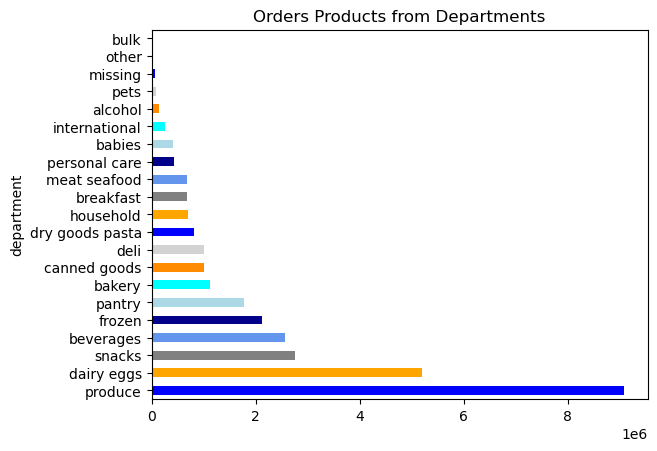

In [114]:
#Creating a bar chart of IC customer profile orders from products in depts, 
bardowhordersproducts = df_deptsw_merge[df_deptsw_merge.loc(df_deptsw_merge['department'].value_counts().plot.bar(title = 'Orders Products from Departments')

In [115]:
#Creating a subset customer profile - top 10 most popular products in produce
top_popular_produce = df_deptsw_merge.loc[df_deptsw_merge['department'].isin(['produce'])]

In [116]:
# Checking 
df_deptsw_merge['department'].value_counts(dropna=False)

department
produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meat seafood        674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

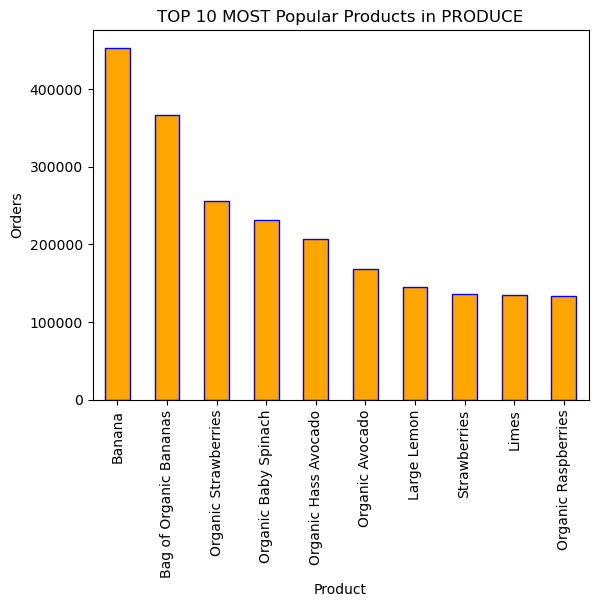

In [118]:
#Creating the bar chart of top popular produce
bar_top_popular_produce = top_popular_produce['product_name'].value_counts()[:10].plot.bar(title='TOP 10 MOST Popular Products in PRODUCE', xlabel='Product', ylabel='Orders', color='orange', edgecolor='blue' )

In [119]:
#Exporting and saving it to IC folder
bar_top_popular_produce.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_top_popular_produce.png'))

In [120]:
#Exporting and saving it to IC folder
bardowhordersproducts.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'final_orders_products_depts.png'))

# Exporting customer profile finals as pkl

In [121]:
df_deptsw_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_customer_profile_family_status_depts.pkl'))